In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

%matplotlib inline

In [29]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('../Questions/Q7_Data/US Presidential Data.csv')
X = df.values[:, 1:]
y = df.values[:, 0]

X, XTest, y, yTest = train_test_split(X, y, test_size=0.25)

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(n_neighbors=1)
model.fit(X, y)

predictions = model.predict(X)
error = np.linalg.norm(predictions - y)
print('Error for training set on 1-NN classifier: %d' % error)

Error for training set on 1-NN classifier: 0


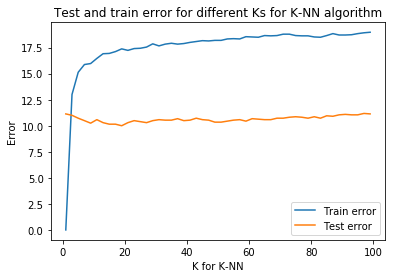

In [41]:
ks = [i for i in range(1, 100, 2)]

test_errors = []
train_errors = []
for k in ks:
    model = KNN(n_neighbors=k)
    model.fit(X, y)
    train_p = model.predict(X)
    test_p = model.predict(XTest)
    train_errors.append(np.linalg.norm(y - train_p))
    test_errors.append(np.linalg.norm(yTest - test_p))
    
plot.plot(ks, train_errors, label='Train error')
plot.plot(ks, test_errors, label='Test error')
plot.xlabel('K for K-NN')
plot.ylabel('Error')
plot.title('Test and train error for different Ks for K-NN algorithm')
plot.legend()